# Lab 2: Confidence Intervals and Hypothesis Testing

In [78]:
import pandas as pd
from plotnine import ggplot, aes, stat_qq, stat_qq_line, geom_boxplot, geom_density, coord_flip, geom_vline, geom_hline, geom_histogram, labs
import scipy.stats 
import statsmodels.api as sm
import statsmodels.stats.weightstats as smws
import numpy as np
import scipy
from scipy.stats import anderson, shapiro

## Question Set 1
Revisit the normtemp dataset from lab 1 where we examined the observed mean body temperature (temperature) in comparison to the well-known "average" 98.6 degrees. Use the temperature variable to answer the following questions:

In [79]:
normtemp = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/normtemp.csv", sep=r'\s+')

normtemp.head()

,temperature,gender,hr
1,96.3,1,70
2,96.7,1,71
3,96.9,1,74
4,97.0,1,80
5,97.1,1,73


### Question 1a
Perform a statistical test (alpha = .05) to determine whether this well-known number is actually the mean body temperature. What is your t-statistic? (round to 2 decimal places)

In [80]:
normtempstats = smws.DescrStatsW(normtemp['temperature'])

test_stat_normtemp_mean, p_val_normtemp_mean, df_normtemp_mean = normtempstats.ttest_mean(98.6, alternative='two-sided')

print(f"t-statistic: {test_stat_normtemp_mean:.4f}")


t-statistic: -5.4548


### Question 1b
T/F: The p-value means we reject the null hypothesis in favor of the alternative and there is sufficient evidence that the mean is 98.6.

Answer: False

### Question 1c
Give the 95% confidence interval for temperature.

In [81]:
lower_normtemp_conf, upper_normtemp_conf = normtempstats.tconfint_mean(0.05)

print(round(lower_normtemp_conf, 4), "|", round(upper_normtemp_conf, 4))

98.122 | 98.3765


### Question 1d
If we restrict our analysis to only the females in this dataset, will our conclusion change?

In [82]:
female_temp_stats = smws.DescrStatsW(normtemp[normtemp['gender'] == 2]['temperature'])

test_stat_normtemp_f_mean, p_val_normtemp_f_mean, df_normtemp_f_mean = female_temp_stats.ttest_mean(98.6, alternative='two-sided')
print(f"t-statistic is {test_stat_normtemp_f_mean:.4f}, p-value is {p_val_f:.4f}")

lower_normtemp_f_mean, upper_normtemp_f_mean = female_temp_stats.tconfint_mean(0.05)    
print(f"{lower_normtemp_f_mean:.4f} | {upper_normtemp_f_mean:.4f}")

t-statistic is -2.2355, p-value is 0.0289
98.2096 | 98.5781


Answer: No, not at alpha = .05

## Question Set 2
The Airline dataset contains information regarding the number of international airline travelers (variable air) across different months of the year from 1949-1960. 

We are interested in knowing if during this time period there was a significant difference between air travel in the summer months (Jun, Jul, and Aug) vs the remainder of the year.

Use this data to answer the following questions:

In [83]:
airline = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/Airline.csv")

### Question 2a
What is the shape of the distribution for the number of passengers for the summer data?

In [84]:
summer_months = ['Jun', 'Jul', 'Aug']

airline_summer = airline[airline['Month'].isin(summer_months)]

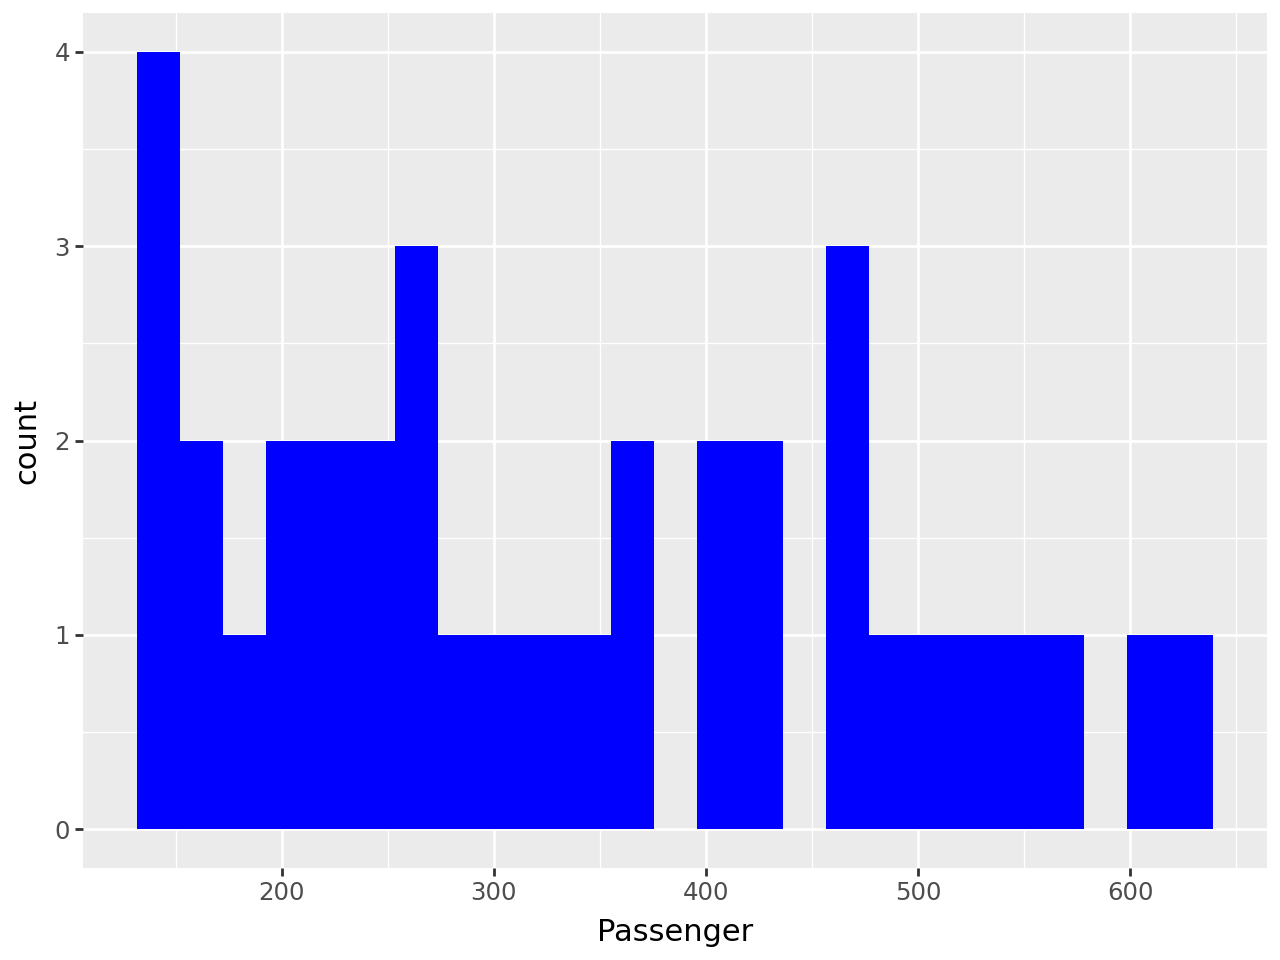

In [85]:
airline_summer_hist = (ggplot(airline_summer, aes(x = airline_summer['Passenger'])) +
                geom_histogram(fill = 'blue', bins = 25))

airline_summer_hist.show()

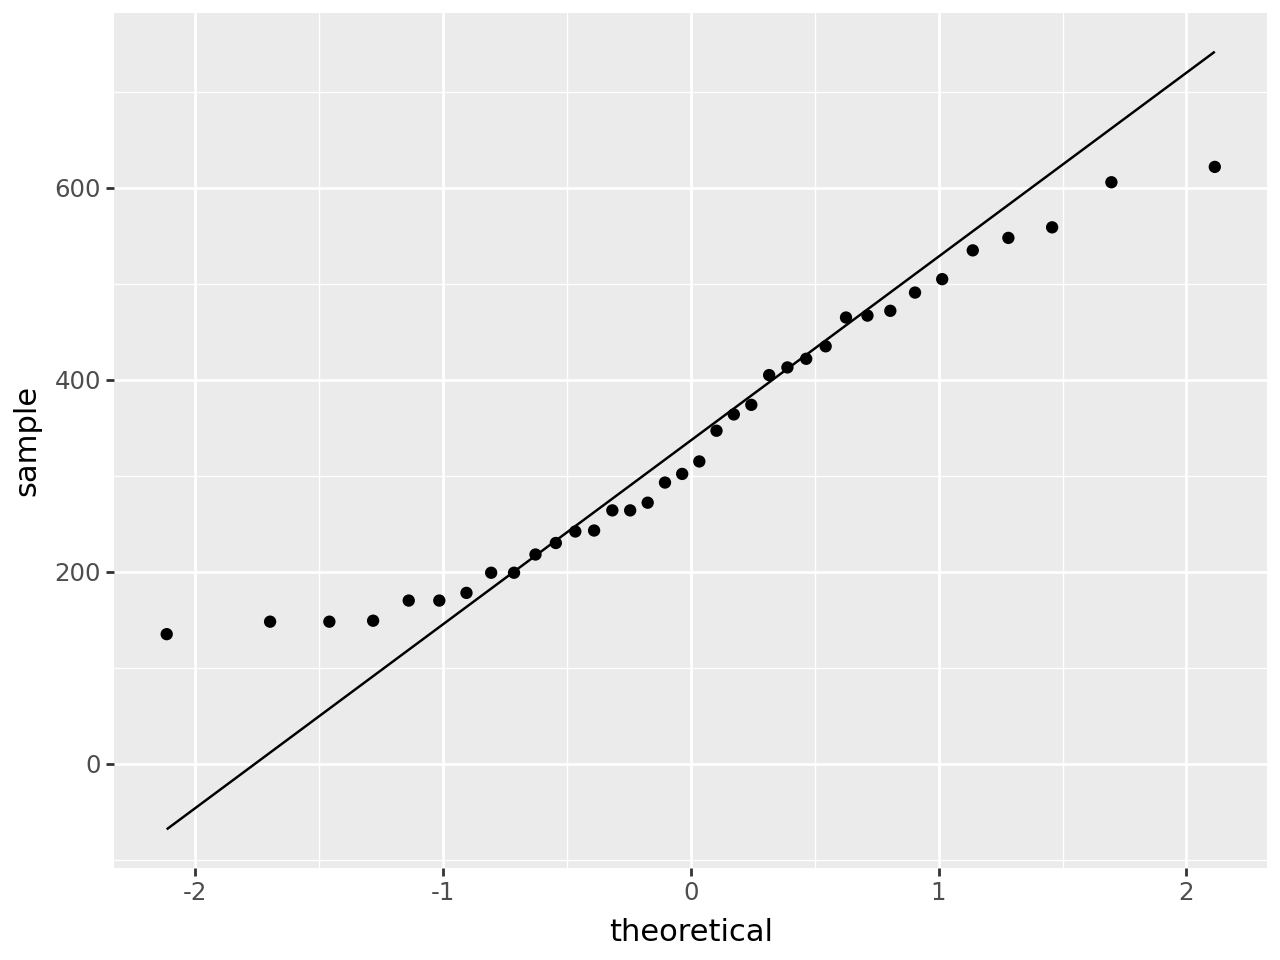

In [86]:
airline_summer_qq = (ggplot(airline_summer, aes(sample = airline_summer['Passenger'])) +
                     stat_qq() +
                     stat_qq_line())
airline_summer_qq.show()

In [87]:
test_stat_airline_summer_shapiro, p_val_airline_summer_shapiro = scipy.stats.shapiro(airline_summer['Passenger'])
print(f"Shapiro-Wilk test statistic: {test_stat_airline_summer_shapiro:.4f}, p-value: {p_val_airline_summer_shapiro:.4f}")

test_stat_airline_summer_ad, critical_values_airline_summer, sig_level_airline_summer = anderson(airline_summer['Passenger'], dist='norm')
print(f"Anderson-Darling test statistic: {test_stat_airline_summer_ad:.4f}, critical values: {critical_values_airline_summer}, sig_level: {sig_level_airline_summer}")

Shapiro-Wilk test statistic: 0.9398, p-value: 0.0500
Anderson-Darling test statistic: 0.6478, critical values: [0.528 0.601 0.721 0.841 1.   ], sig_level: [15.  10.   5.   2.5  1. ]


Answer: None of these/right skewed

### Question 2b
What is the shape of the distribution for the number of passengers for the non-summer data?

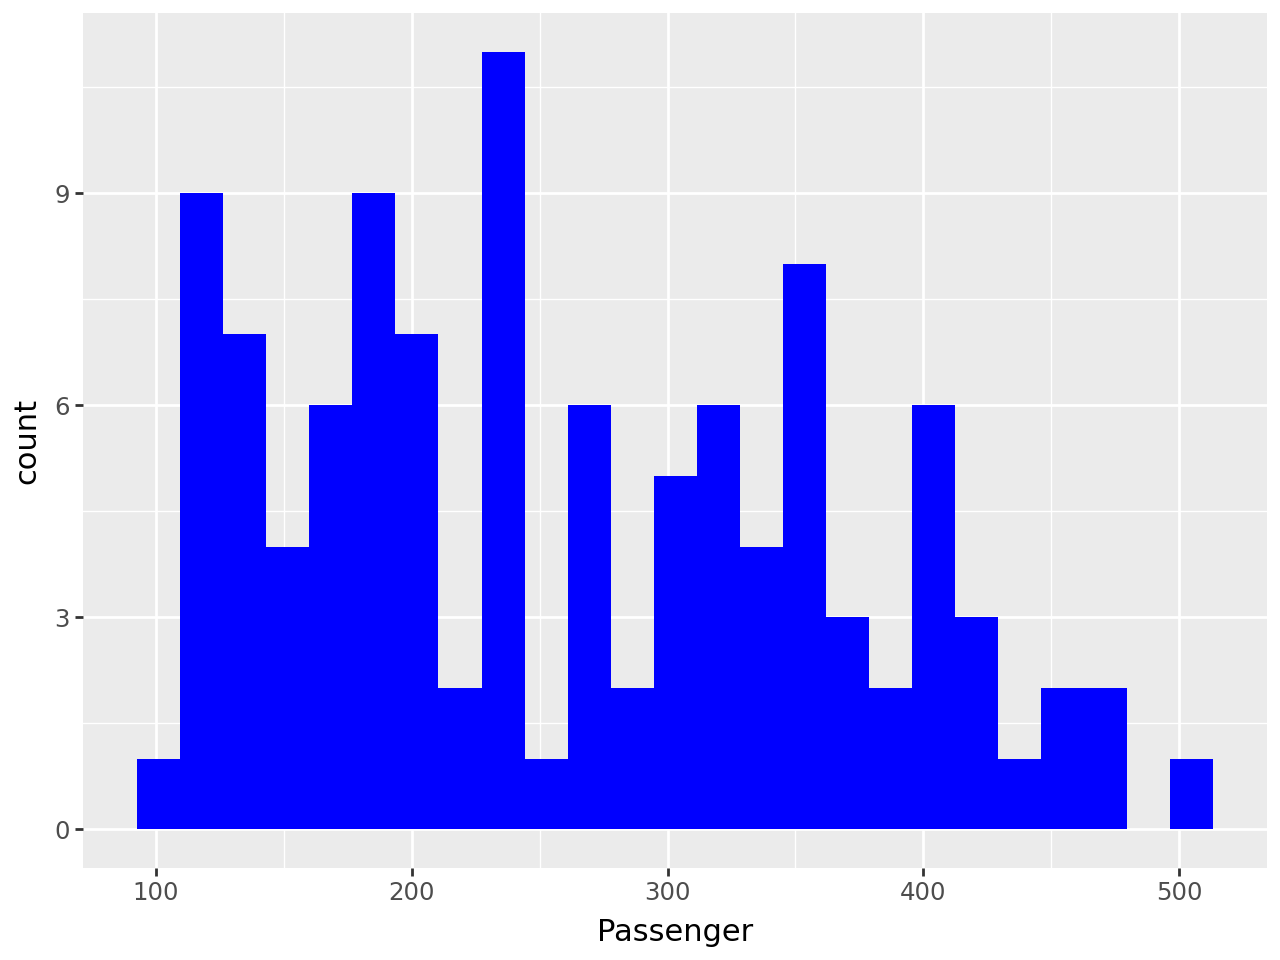

In [88]:
airline_not_summer = airline[~airline['Month'].isin(summer_months)]

airline_not_summer_hist = (ggplot(airline_not_summer, aes(x = airline_not_summer['Passenger'])) +
                geom_histogram(fill = 'blue', bins = 25))

airline_not_summer_hist.show()

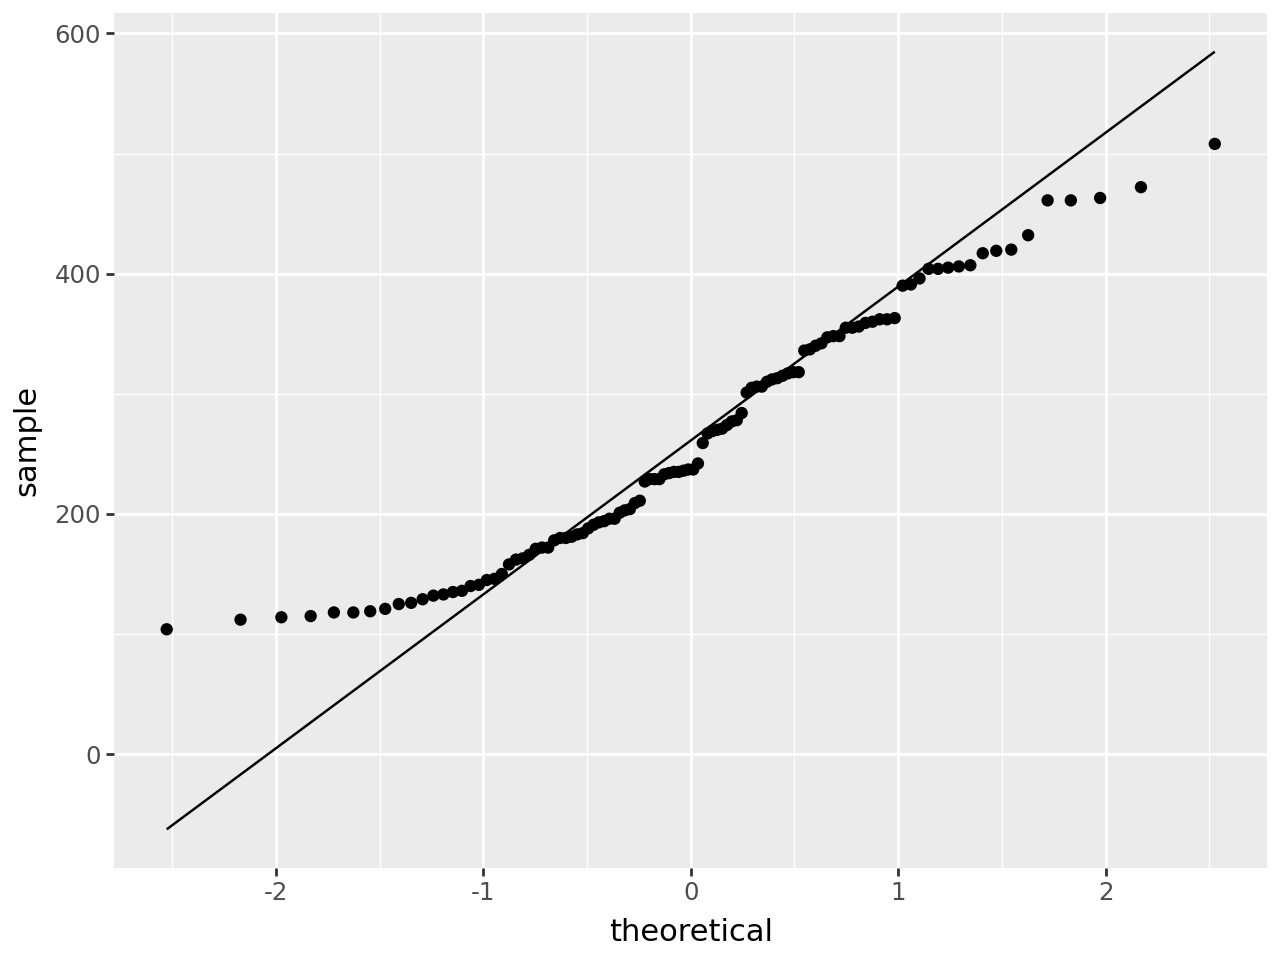

In [89]:
airline_not_summer_qq = (ggplot(airline_not_summer, aes(sample = airline_not_summer['Passenger'])) +
                     stat_qq() +
                     stat_qq_line())
airline_not_summer_qq.show()

In [92]:
test_stat_airline_not_summer_shapiro, p_val_airline_not_summer_shapiro = scipy.stats.shapiro(airline_not_summer['Passenger'])
print(f"Shapiro-Wilk test statistic: {test_stat_airline_summer_shapiro:.4f}, p-value: {p_val_airline_summer_shapiro:.4f}")

test_stat_airline_not_summer_ad, critical_values_airline_not_summer, sig_level_airline_not_summer = anderson(airline_not_summer['Passenger'], dist='norm')
print(f"Anderson-Darling test statistic: {test_stat_airline_summer_ad:.4f}, critical values: {critical_values_airline_not_summer}, sig_level: {sig_level_airline_not_summer}")

Shapiro-Wilk test statistic: 0.9398, p-value: 0.0500
Anderson-Darling test statistic: 0.6478, critical values: [0.557 0.634 0.76  0.887 1.055], sig_level: [15.  10.   5.   2.5  1. ]


Answer: None of these/right skewed

### Question 2d
What type of statistical test is most appropriate for this data?

In [93]:
test_stat_airline_levene, p_val_airline_levene = scipy.stats.levene(airline_summer['Passenger'], airline_not_summer['Passenger'])
print(test_stat_airline_levene, p_val_airline_levene)

9.120371526141957 0.0029982414290395847


Answer: Because the distributions are not normal and have unequal variance, use the Wilcoxon Rank-Sum test.

### Question 2e
Perform the correct statistical test and report the p-value (round to 4 decimal places).

In [96]:
test_stat_airline_rank_sum, p_val_airline_rank_sum = scipy.stats.mannwhitneyu(airline_summer['Passenger'], airline_not_summer['Passenger'])
print(f"{test_stat_airline_rank_sum}, {p_val_airline_rank_sum:.4f}")

2541.5, 0.0059
